In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import warnings 
import re
from textblob import TextBlob


#importing data as a text file
filename = 'D:/work/projects/spottle.ai/Spottle-EDA-of-COVID19/tweets_corona.txt'

In [2]:
#libraries for visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image


#ignoring warnings in the output
warnings.filterwarnings('ignore')

In [3]:
file = open(filename,encoding='utf8')
text = file.read()
tweets = text.split("\n")

In [9]:
tweets2 = []
with open(filename, 'r', encoding = 'utf8') as f:
    tweets2.append([[x.strip()] for x in f.readlines() if x.strip() != ''])

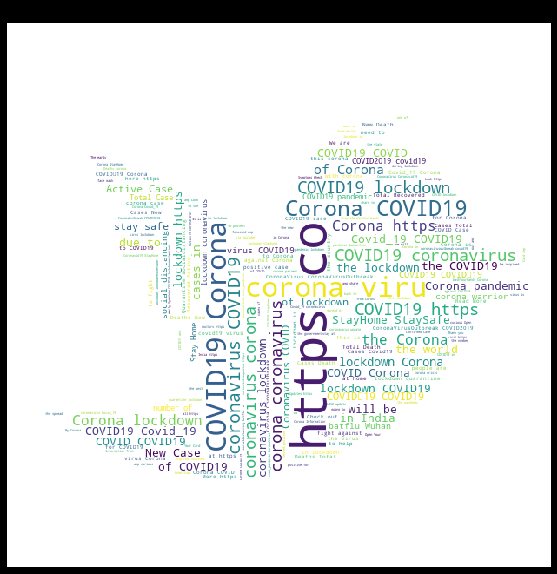

In [5]:
# creating wordcloud of the most common words used in the tweets
def word_cloud(tweets):
    wave_mask = np.array(Image.open( "twitter.jpg"))      #creates a mask for the wordcloud
    stopwords = set(STOPWORDS)                            #removing the stopwords 
    wordcloud = WordCloud(mask=wave_mask,background_color="white", stopwords=stopwords, random_state = 2016).generate(" ".join([tw for tw in tweets]))
    #displaying the wordcloud
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Twitter WordCloud")
word_cloud(tweets)

              hashtag
#COVID19        49016
#Corona         30586
#lockdown       23420
#coronavirus    21504
#corona         19609


<BarContainer object of 5 artists>

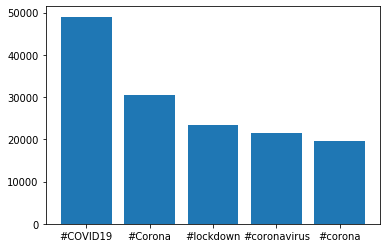

In [6]:
import re
import pandas as pd

raw = ' '.join(tweets)                                                 #bring all the tweets in one line/ joining by the spaces
tags = [re.sub(r"(\W+)$", "", j) \
        for j in [i for i in raw.split() if i.startswith("#")]]        #extracting the tags
df = pd.DataFrame({"hashtag": tags})                                   #converting it into the dataframe
df_top5 = pd.DataFrame(df['hashtag'].value_counts().head(5))           #top 5 tags in the tweets
print(df_top5)
new = pd.DataFrame(df_top5).reset_index()

#plotting the data
plt.bar(new['index'],new['hashtag'])